<a href="https://colab.research.google.com/github/Rkitenge91/MATH5010-repository/blob/main/Raissa_Kitenge_Lab_3_Hypothesis_Tests_Poisson_Exponential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MATH 5010-Lab 3



In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm, chi2, gamma, invgamma
rng = np.random.default_rng(2025)


# Study example, based on homework 9 solutions:


### Hypothesis Testing: Poisson & Exponential (Classical + Bayesian)

- Likelihood Ratio Tests (LRT)
- p-values
- Type I/II errors
- Bayesian tests (Gamma & Inverse-Gamma priors)
- Poisson and Exponential models


## Part 1 — Poisson Hypothesis Test

We test:

$$
H_0: \lambda = \lambda_0
\qquad vs.\qquad
H_1: \lambda > \lambda_0.
$$


In [ ]:

# simulate Poisson data
n = 40
lambda0 = 5
X = rng.poisson(lam=lambda0, size=n)
S = X.sum()
xbar = X.mean()
xbar


np.float64(5.325)

### Classical LRT and p-value

In [ ]:

# CLT z-test for Poisson mean
z = (xbar - lambda0)/np.sqrt(lambda0/n)
p_value = 1 - norm.cdf(z)
z, p_value


(np.float64(0.9192388155425122), np.float64(0.17898533632216396))

### Bayesian Test for Poisson Mean (Gamma prior)

In [ ]:

# Bayesian Poisson test: Gamma(a,b) prior
a, b = 2, 1
post_shape = a + S
post_rate = b + n

# Gamma CDF for posterior probability P(λ ≤ λ0 | data)
post_cdf = gamma.cdf(lambda0, a=post_shape, scale=1/post_rate)

post_shape, post_rate, post_cdf


(np.int64(215), 41, np.float64(0.2514163565334182))


## Part 2 — Exponential Hypothesis Test

Model:  
$$
X_i \sim \mathrm{Exp}(\mu).
$$

Test:

$$
H_0: \mu = \mu_0
\qquad vs.\qquad
H_1: \mu > \mu_0.
$$


In [ ]:

# simulate exponential data
n2 = 30
mu0 = 10
X2 = rng.exponential(scale=mu0, size=n2)
S2 = X2.sum()
xbar2 = X2.mean()
xbar2


np.float64(12.309260086707004)

### Classical LRT Using Chi-Square Distribution

In [ ]:

T = 2 * n2 * xbar2 / mu0
p_value2 = 1 - chi2.cdf(T, df=2*n2)
T, p_value2


(np.float64(73.85556052024202), np.float64(0.10774510335765575))

### Bayesian Test for Exponential Mean (Inverse-Gamma prior)

In [ ]:

# Bayesian exponential test
a2, b2 = 3, 10
post_shape2 = a2 + n2
post_scale2 = b2 + S2  # inverse-gamma uses "scale"

post_cdf2 = invgamma.cdf(mu0, a=post_shape2, scale=post_scale2)

post_shape2, post_scale2, post_cdf2


(33, np.float64(379.2778026012101), np.float64(0.19055045199442666))

## Part 3 — Visualization

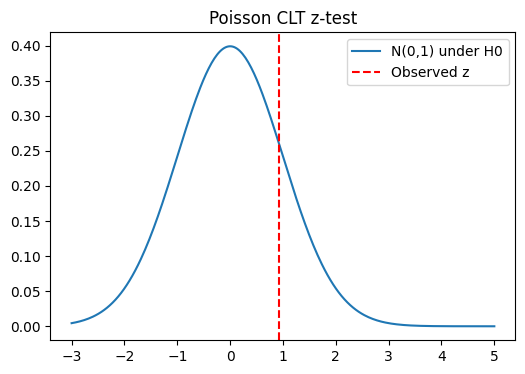

In [ ]:

# Poisson z-test visualization
zgrid = np.linspace(-3, 5, 300)
plt.figure(figsize=(6,4))
plt.plot(zgrid, norm.pdf(zgrid), label="N(0,1) under H0")
plt.axvline(z, color='red', linestyle='--', label='Observed z')
plt.title("Poisson CLT z-test")
plt.legend()
plt.show()


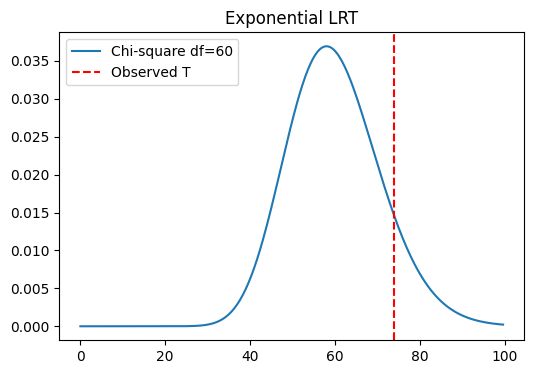

In [ ]:

# Exponential LRT visualization
grid = np.linspace(0, chi2.ppf(0.999, 2*n2), 300)
plt.figure(figsize=(6,4))
plt.plot(grid, chi2.pdf(grid, 2*n2), label=f"Chi-square df={2*n2}")
plt.axvline(T, color='red', linestyle='--', label='Observed T')
plt.title("Exponential LRT")
plt.legend()
plt.show()


# Your work, based on Lecture Notes

1. Do the same work above for the mean in Normal Distribuiton (with and without known variance $\sigma^2$)

2. Do the same work above for Bernoulli Distribuiton


For each quesiton:
- Likelihood Ratio Tests (LRT)
- p-values
- Type I/II errors
- Bayesian tests (Gamma & Inverse-Gamma priors)
- Poisson and Exponential models
- Draw the graph for Visualization

# NORMAL DISTRIBUTION

1. Normal mean, $\sigma^2$ Known

## Part A — Normal Mean Test (σ² known)

Model:
$$
X_i \sim N(\mu,\sigma^2), \quad i=1,\dots,n,
$$
with **known** variance $\sigma^2$.

We test
$$
H_0:\ \mu = \mu_0 \qquad vs.\qquad H_1:\ \mu > \mu_0.
$$

In [24]:
# simulate Normal data (sigma^2 known)
n_norm = 40
mu0 = 0.0
sigma = 2.0

X_norm = rng.normal(loc=mu0, scale=sigma, size=n_norm)
S_norm = X_norm.sum()
xbar_norm = X_norm.mean()
xbar_norm

np.float64(0.47604913517610986)

### Classical LRT and p-value (σ² known)

For known $\sigma^2$ the LRT is equivalent to a z-test:
$$
Z = \frac{\overline{X} - \mu_0}{\sigma/\sqrt{n}} \sim N(0,1)\ \text{ under } H_0.
$$

We use a **one-sided** p-value:
$$
p = P(Z_{\text{null}} \ge z_{\text{obs}}).
$$

In [25]:
# Classical LRT and p-value (sigma^2 known)
z_norm = (xbar_norm - mu0) / (sigma / np.sqrt(n_norm))
p_value_norm = 1 - norm.cdf(z_norm)
z_norm, p_value_norm

(np.float64(1.5053995453098892), np.float64(0.06611069296257233))

### Type I and Type II errors (σ² known)

We fix $\alpha = 0.05$.

- Type I error: simulate under $H_0$ ($\mu = \mu_0$).
- Type II error: simulate under an alternative, e.g. $\mu = \mu_1 > \mu_0$.

In [26]:
# Type I and Type II errors for Normal (sigma^2 known)

alpha = 0.05
z_crit = norm.ppf(1 - alpha)

mu1 = 0.8        # choose an alternative mean
n_sim = 10_000

# estimate Type I error (mu = mu0)
count_reject_H0 = 0
for _ in range(n_sim):
    X_sim = rng.normal(loc=mu0, scale=sigma, size=n_norm)
    xbar_sim = X_sim.mean()
    z_sim = (xbar_sim - mu0) / (sigma / np.sqrt(n_norm))
    if z_sim > z_crit:
        count_reject_H0 += 1
type_I_norm = count_reject_H0 / n_sim

# estimate Type II error (mu = mu1)
count_reject_H1 = 0
for _ in range(n_sim):
    X_sim = rng.normal(loc=mu1, scale=sigma, size=n_norm)
    xbar_sim = X_sim.mean()
    z_sim = (xbar_sim - mu0) / (sigma / np.sqrt(n_norm))
    if z_sim > z_crit:
        count_reject_H1 += 1
power_norm = count_reject_H1 / n_sim
type_II_norm = 1 - power_norm

type_I_norm, power_norm, type_II_norm

(0.0539, 0.806, 0.19399999999999995)

### Bayesian Test for Normal Mean (Normal prior, σ² known)

Prior:
$$
\mu \sim N(m_0, \tau_0^2).
$$

Posterior:
$$
\mu | X \sim N(m_n, \tau_n^2),
$$
with
$$
\tau_n^2 = \left(\frac{1}{\tau_0^2} + \frac{n}{\sigma^2}\right)^{-1},
\qquad
m_n = \tau_n^2\left(\frac{m_0}{\tau_0^2} + \frac{n\overline{X}}{\sigma^2}\right).
$$

We compute
$$
P(\mu \le \mu_0 \mid X) = \Phi\!\left(\frac{\mu_0 - m_n}{\tau_n}\right).
$$

In [27]:
# Bayesian Normal test: Normal(m0, tau0^2) prior
m0 = 0.0
tau0 = 3.0
tau0_sq = tau0**2

post_var_norm = 1.0 / (1.0/tau0_sq + n_norm/(sigma**2))
post_sd_norm = np.sqrt(post_var_norm)
post_mean_norm = post_var_norm * (m0/tau0_sq + n_norm * xbar_norm / (sigma**2))

post_cdf_norm = norm.cdf(mu0, loc=post_mean_norm, scale=post_sd_norm)
post_mean_norm, post_sd_norm, post_cdf_norm

(np.float64(0.4708178259983504),
 np.float64(0.3144854510165755),
 np.float64(0.06718293438197406))

### Graph for Visualization (σ² known)

We plot the standard Normal density under $H_0$ and mark the observed $z$.

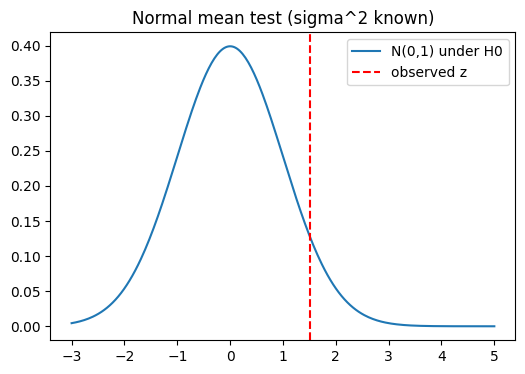

In [48]:
# Graph for Normal z-test (sigma^2 known)
z_grid = np.linspace(-3, 5, 300)
plt.figure(figsize=(6,4))
plt.plot(z_grid, norm.pdf(z_grid), label="N(0,1) under H0")
plt.axvline(z_norm, color='red', linestyle='--', label='observed z')
plt.legend()
plt.title("Normal mean test (sigma^2 known)")
plt.show()

## Part B — Normal Mean Test (σ² unknown)

Now $\sigma^2$ is **unknown**.

We test
$$
H_0:\ \mu = \mu_0 \qquad vs.\qquad H_1:\ \mu > \mu_0.
$$

The LRT is equivalent to the one-sample t-test:
$$
T = \frac{\overline{X}-\mu_0}{S/\sqrt{n}}, \quad T \sim t_{n-1} \text{ under } H_0.
$$

In [32]:
# simulate Normal data (sigma^2 unknown)
n_norm2 = 40
mu0_2 = 0.0
true_mu = 0.5
true_sigma = 2.0

X_norm2 = rng.normal(loc=true_mu, scale=true_sigma, size=n_norm2)
S_norm2 = X_norm2.sum()
xbar_norm2 = X_norm2.mean()
s_norm2 = X_norm2.std(ddof=1)
xbar_norm2, s_norm2

(np.float64(0.529043907548824), np.float64(2.311795343872317))

### Classical LRT and p-value (σ² unknown)

We use the t statistic:
$$
T = \frac{\overline{X}-\mu_0}{S/\sqrt{n}},
$$
with a one-sided p-value
$$
p = P\bigl(t_{n-1} \ge T_{\text{obs}}\bigr).
$$

In [33]:
# Classical LRT and p-value (sigma^2 unknown)
T_norm = (xbar_norm2 - mu0_2) / (s_norm2 / np.sqrt(n_norm2))
p_value_norm2 = 1 - t.cdf(T_norm, df=n_norm2 - 1)
T_norm, p_value_norm2

(np.float64(1.447345877328), np.float64(0.07789558583893252))

TYPE | AND TYPE || ERRORS

In [34]:
# Type I and Type II errors for Normal (sigma^2 unknown)

alpha = 0.05
t_crit = t.ppf(1 - alpha, df=n_norm2 - 1)

mu1_2 = 0.8
n_sim = 10_000

# Type I: mu = mu0_2
count_reject0 = 0
for _ in range(n_sim):
    X_sim = rng.normal(loc=mu0_2, scale=true_sigma, size=n_norm2)
    xbar_sim = X_sim.mean()
    s_sim = X_sim.std(ddof=1)
    T_sim = (xbar_sim - mu0_2) / (s_sim / np.sqrt(n_norm2))
    if T_sim > t_crit:
        count_reject0 += 1
type_I_t = count_reject0 / n_sim

# Type II: mu = mu1_2
count_reject1 = 0
for _ in range(n_sim):
    X_sim = rng.normal(loc=mu1_2, scale=true_sigma, size=n_norm2)
    xbar_sim = X_sim.mean()
    s_sim = X_sim.std(ddof=1)
    T_sim = (xbar_sim - mu0_2) / (s_sim / np.sqrt(n_norm2))
    if T_sim > t_crit:
        count_reject1 += 1
power_t = count_reject1 / n_sim
type_II_t = 1 - power_t

type_I_t, power_t, type_II_t

(0.0462, 0.7973, 0.2027)

BAYESIAN TEST

In [35]:
# Bayesian Normal test (sigma^2 unknown, use S^2)

m0_b = 0.0
tau0_b = 3.0
tau0_b_sq = tau0_b**2

post_var_t = 1.0 / (1.0/tau0_b_sq + n_norm2/(s_norm2**2))
post_sd_t = np.sqrt(post_var_t)
post_mean_t = post_var_t * (m0_b/tau0_b_sq + n_norm2 * xbar_norm2 / (s_norm2**2))

post_cdf_t = norm.cdf(mu0_2, loc=post_mean_t, scale=post_sd_t)
post_mean_t, post_sd_t, post_cdf_t

(np.float64(0.5213048507390516),
 np.float64(0.3628435550020572),
 np.float64(0.07539868365216157))

VISUALIZATION

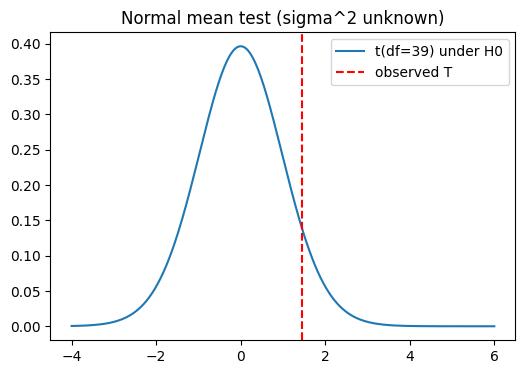

In [49]:
# Graph for Normal t-test (sigma^2 unknown)
t_grid = np.linspace(-4, 6, 300)
plt.figure(figsize=(6,4))
plt.plot(t_grid, t.pdf(t_grid, df=n_norm2 - 1), label=f"t(df={n_norm2-1}) under H0")
plt.axvline(T_norm, color='red', linestyle='--', label='observed T')
plt.legend()
plt.title("Normal mean test (sigma^2 unknown)")
plt.show()

## Part C — Bernoulli Distribution

Model:
$$
X_i \sim \text{Bernoulli}(p), \quad i=1,\dots,n.
$$

We test
$$
H_0:\ p = p_0 \qquad vs.\qquad H_1:\ p > p_0.
$$

In [37]:
# simulate Bernoulli data
n_bern = 40
p0 = 0.5

X_bern = rng.binomial(n=1, p=p0, size=n_bern)
S_bern = X_bern.sum()
phat_bern = X_bern.mean()
phat_bern

np.float64(0.375)

### Classical LRT and p-value

Likelihood:
$$
L(p) = p^S(1-p)^{n-S}, \quad S = \sum X_i.
$$

MLE: $\hat{p} = S/n$.

Likelihood ratio:
$$
\Lambda = \frac{L(p_0)}{L(\hat{p})}, \qquad
-2\log\Lambda \approx \chi^2_1 \text{ under } H_0.
$$

In [38]:
# Classical LRT and p-value for Bernoulli
eps = 1e-12
phat_c = np.clip(phat_bern, eps, 1 - eps)

loglik_H0 = S_bern * np.log(p0) + (n_bern - S_bern) * np.log(1 - p0)
loglik_MLE = S_bern * np.log(phat_c) + (n_bern - S_bern) * np.log(1 - phat_c)

LR_bern = -2 * (loglik_H0 - loglik_MLE)
p_value_LRT_bern = 1 - chi2.cdf(LR_bern, df=1)
LR_bern, p_value_LRT_bern

(np.float64(2.5267153921570653), np.float64(0.11193299783186139))

TYPE | AND TYPE || ERRORS

In [39]:
# Type I and Type II errors for Bernoulli LRT

alpha = 0.05
crit_bern = chi2.ppf(1 - alpha, df=1)

p1 = 0.7
n_sim = 10_000

# Type I (p = p0)
count_reject0 = 0
for _ in range(n_sim):
    X0 = rng.binomial(n=1, p=p0, size=n_bern)
    S0 = X0.sum()
    phat0 = S0 / n_bern
    phat0_c = np.clip(phat0, eps, 1 - eps)
    ll0_H0 = S0 * np.log(p0) + (n_bern - S0) * np.log(1 - p0)
    ll0_MLE = S0 * np.log(phat0_c) + (n_bern - S0) * np.log(1 - phat0_c)
    stat0 = -2 * (ll0_H0 - ll0_MLE)
    if stat0 > crit_bern:
        count_reject0 += 1
type_I_bern = count_reject0 / n_sim

# Type II (p = p1)
count_reject1 = 0
for _ in range(n_sim):
    X1 = rng.binomial(n=1, p=p1, size=n_bern)
    S1 = X1.sum()
    phat1 = S1 / n_bern
    phat1_c = np.clip(phat1, eps, 1 - eps)
    ll1_H0 = S1 * np.log(p0) + (n_bern - S1) * np.log(1 - p0)
    ll1_MLE = S1 * np.log(phat1_c) + (n_bern - S1) * np.log(1 - phat1_c)
    stat1 = -2 * (ll1_H0 - ll1_MLE)
    if stat1 > crit_bern:
        count_reject1 += 1
power_bern = count_reject1 / n_sim
type_II_bern = 1 - power_bern

type_I_bern, power_bern, type_II_bern

(0.0373, 0.7073, 0.29269999999999996)

### Bayesian Test for Bernoulli p (Beta prior)

Prior:
$$
p \sim \text{Beta}(a,b).
$$

Posterior:
$$
p|X \sim \text{Beta}(a+S,\ b+n-S).
$$

We compute $P(p \le p_0 \mid X)$ from the Beta CDF.

In [40]:
# Bayesian Bernoulli test: Beta(a,b) prior
a_prior = 2.0
b_prior = 2.0

a_post = a_prior + S_bern
b_post = b_prior + (n_bern - S_bern)

post_cdf_bern = beta.cdf(p0, a=a_post, b=b_post)
a_post, b_post, post_cdf_bern

(np.float64(17.0), np.float64(27.0), np.float64(0.9368552628072848))

### Visualization

We plot the $\chi^2_1$ reference density with the observed statistic,
and also the prior and posterior for $p$.

GRAPH 1

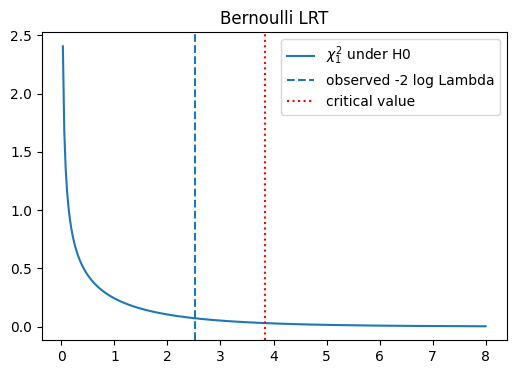

In [52]:
# Graph 1: chi-square reference for LRT
x_grid = np.linspace(0, max(8, LR_bern + 2), 300)
plt.figure(figsize=(6,4))
plt.plot(x_grid, chi2.pdf(x_grid, df=1), label=r"$\chi^2_1$ under H0")
plt.axvline(LR_bern, linestyle='--', label='observed -2 log Lambda')
plt.axvline(crit_bern, color='red',linestyle=':', label='critical value')
plt.legend()
plt.title("Bernoulli LRT")
plt.show()

GRAPH 2

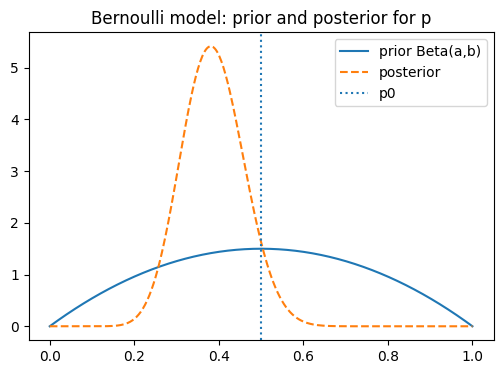

In [42]:
# Graph 2: prior and posterior for p
p_grid = np.linspace(0, 1, 400)
plt.figure(figsize=(6,4))
plt.plot(p_grid, beta.pdf(p_grid, a_prior, b_prior), label="prior Beta(a,b)")
plt.plot(p_grid, beta.pdf(p_grid, a_post, b_post), linestyle='--', label="posterior")
plt.axvline(p0, linestyle=':', label='p0')
plt.legend()
plt.title("Bernoulli model: prior and posterior for p")
plt.show()

This is the end of Lab 3.